## FFT Code

In [1]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
img_name = 'sample.png' # input image name with extension
output_name = 'sample_approx' # output image name
extension = 'jpg' # output image extension
reconvert_png = True # if output image needs to be converted to png
final_extension = 'png' # final image extension
keep = 0.95 # percentage of fourier coefficients to keep. Put a decimal value like 0.15 for 15%
quality = 30 # quality parameter of final png image. 30 is good for balance between compression and quality. Any no
             # between 0 and 85 can be chosen

In [3]:
image = Image.open(img_name)

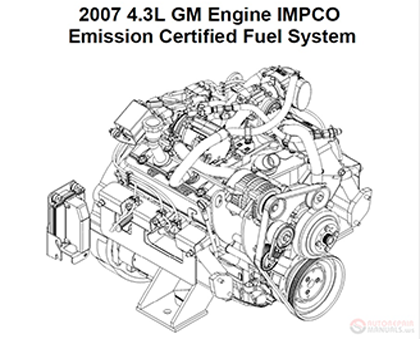

In [4]:
image

In [5]:
image.size

(420, 339)

In [6]:
img = np.asarray(image)
img.shape

(339, 420, 4)

In [7]:
def compress_grayscale_image(img, keep = 0.10, plot = False):
    
    # convert to grayscale if rgb
    if len(img.shape) > 2:
        img = np.mean(img, -1)
    
    img_coefs = np.fft.fft2(img)
    img_coefs_sort = np.sort(np.abs(img_coefs.reshape(-1)))
    
    thresh = img_coefs_sort[int(np.floor((1 - keep) * len(img_coefs_sort)))]
    ind = np.abs(img_coefs) > thresh
    Atlow = img_coefs * ind
    Atlow = np.fft.ifft2(Atlow).real
    
    if plot:
        plt.figure()
        plt.imshow(Atlow, cmap = 'gray')
        plt.axis('off')
        plt.title(f'Compress image: keep = {keep*100} %')
    
    return Atlow

def apply_fft_by_dimension(img, keep, plot = False):
    img_red = img[:,:,0]
    img_green = img[:,:,1]
    img_blue = img[:,:,2]
    
    img_red_compress = compress_grayscale_image(img_red, keep = keep, plot = False)
    img_green_compress = compress_grayscale_image(img_green, keep = keep, plot = False)
    img_blue_compress = compress_grayscale_image(img_blue, keep = keep, plot = False)
    
    img_compress = np.zeros((img.shape[0], img.shape[1], 3))
    
    img_compress[:,:,0] = img_red_compress
    img_compress[:,:,1] = img_green_compress
    img_compress[:,:,2] = img_blue_compress
    
    if plot:
        plt.figure()
        plt.imshow(img_compress)
        plt.axis('off')
        plt.title(f'Compress image: keep = {keep*100} %')
    
    return img_compress

def generate_compressed_image(img, keep):
    img_compress = apply_fft_by_dimension(img, keep = keep, plot = False)
    img_compress = img_compress.astype(np.uint8)
    
    final_image = Image.fromarray(img_compress)
    return final_image

In [8]:
compressed_image = generate_compressed_image(img, keep = keep)

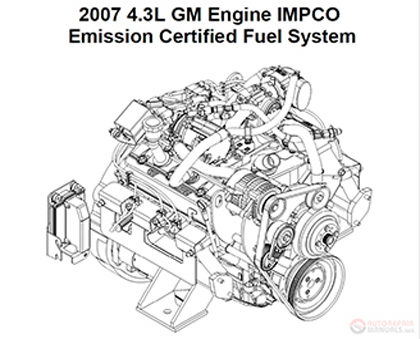

In [9]:
compressed_image

In [10]:
compressed_image.save(output_name + str(int(keep*100)) + '.' + extension)

In [11]:
if reconvert_png:
    final_img = Image.open(output_name + str(int(keep*100)) + '.' + extension)
    final_img.save(output_name + str(int(keep*100)) + '.' + final_extension, quality = quality)